# Image Processing Lab

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image 
%matplotlib inline

### Exercise 1: Generalized function for subsetting pixels

<img src="lab3_exercise1.png" width="800">

In [2]:
e1_img = Image.open('sample_image_1.jpg').convert('L')
e1_img = np.array(e1_img)     # 8-bit code grayscale

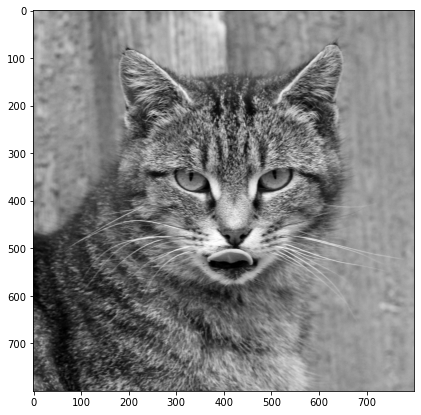

In [3]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e1_img, cmap = 'gray')

In [4]:
#takes in an image and three integer values representing
#the minimum and maximum values for pixels, which if 
#outputs an image which is the original image but smaller such that 
#original length (and width) = original length / downsampling rate 
def subset_pixels(image, min_pixel_depth, max_pixel_depth, replacement_val):
    
    img = image.copy()
    img[img < min_pixel_depth] = replacement_val
    img[img > max_pixel_depth] = replacement_val
    
    return img

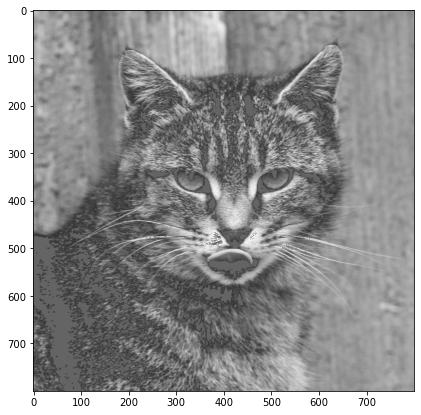

In [5]:
# min_pixel_depth = 50, max_pixel_depth = 250, replacement_val = 100

fig = plt.figure(figsize=(7, 7))

e1_output1 = subset_pixels(image = e1_img, min_pixel_depth = 50, max_pixel_depth = 250, replacement_val = 100)

plt.imshow(e1_output1, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output1.png')

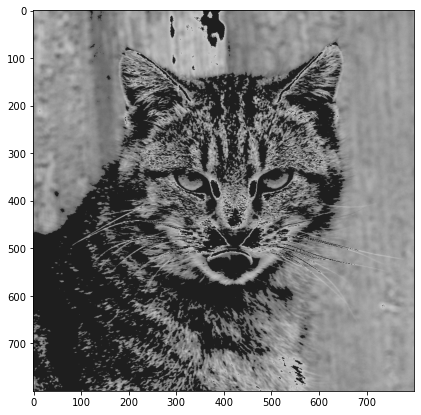

In [6]:
# min_pixel_depth = 100, max_pixel_depth = 200, replacement_val = 30

fig = plt.figure(figsize=(7, 7))

e1_output2 = subset_pixels(image = e1_img, min_pixel_depth = 100, max_pixel_depth = 200, replacement_val = 30)

plt.imshow(e1_output2, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output2.png')

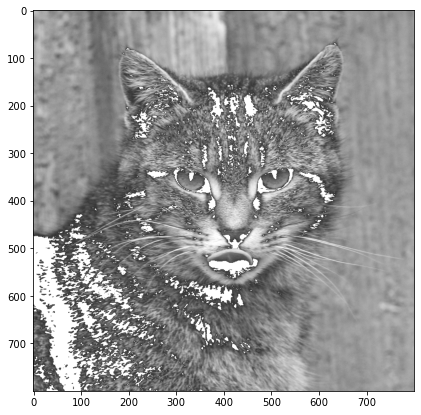

In [7]:
# min_pixel_depth = 50, max_pixel_depth = 255, replacement_val = 255

fig = plt.figure(figsize=(7, 7))

e1_output3 = subset_pixels(image = e1_img, min_pixel_depth = 50, max_pixel_depth = 255, replacement_val = 255)

plt.imshow(e1_output3, cmap = 'gray', vmin = 0, vmax = 255)

plt.savefig('e1_output3.png')

### Exercise 2: Thumbnail generator function

<img src="lab3_exercise2.png" width="800">

In [8]:
e2_img = mpimg.imread('sample_image_2.jpg')
e2_img = np.array(e2_img)     

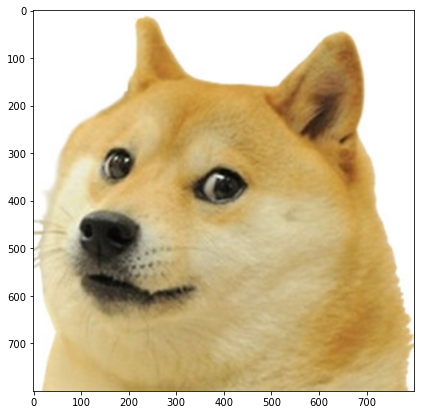

In [9]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e2_img)

In [10]:
#takes in an image and an integer value representing the downsampling rate
#outputs an image which is the original image but smaller such that 
#original length (and width) = original length / downsampling rate 
def create_thumbnail(image, downsampling_rate):
    
    # YOUR CODE HERE
    # USE SEGMENT AVERAGE METHOD (Lecture slide 23) NOT PICK ONE METHOD
    # MAKE SURE YOU ROUND YOUR AVERAGED PIXELS TO INTEGER TO CONFORM TO RGB 8-BIT CODING 
      
    img = image.copy() 
    img_red = img[:, :, 0] #create 2D arrays with original image RGB values
    img_green = img[:, :, 1]
    img_blue = img[:, :, 2]
    
    length = int (len(img_red) / downsampling_rate) #calculate value for length and width of downsampled image
    img_red_final = np.zeros((length, length)) #create 2D arrays for output image RGB values
    img_green_final = np.zeros((length, length))
    img_blue_final = np.zeros((length, length))
    
    #loop through all indexes in downsampled array
    for y in range(0, length):
        for x in range(0, length): 
            totalr = 0 
            totalg = 0
            totalb = 0
            #loop through each square which will become one value (size: downsampling_rate by downsampling_rate)
            for i in range(x * downsampling_rate, (x + 1) * downsampling_rate):
                for j in range(y * downsampling_rate, (y + 1) * downsampling_rate):
                    totalr += img_red[i, j] #sum the values at each index in squares which will become one value 
                    totalg += img_green[i, j]
                    totalb += img_blue[i, j]
            #set correct index in final downsampled array to averaged value of a square to be downsampled
            img_red_final[x, y] = int(totalr / downsampling_rate**2) 
            img_green_final[x, y] = int(totalg / downsampling_rate**2)
            img_blue_final[x, y] = int(totalb / downsampling_rate**2)
    
    output_image = np.stack([img_red_final, img_green_final, img_blue_final], axis = 2).astype('int') #put 2D areas together
    return output_image

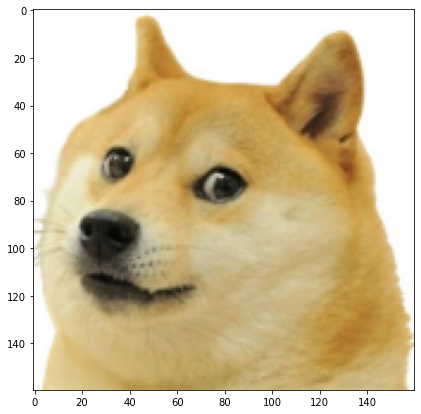

In [11]:
# downsampling rate x5

fig = plt.figure(figsize=(7, 7))

e2_output1 = create_thumbnail(image = e2_img, downsampling_rate = 5)

plt.imshow(e2_output1, vmin = 0, vmax = 255)

plt.savefig('e2_output1.png')

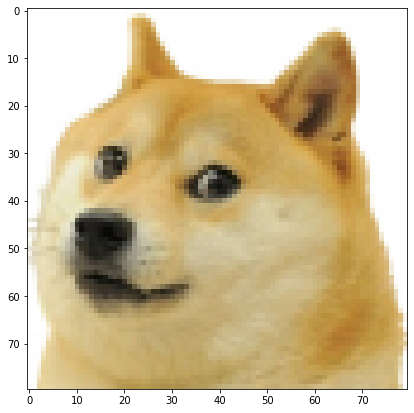

In [12]:
# downsampling rate x10

fig = plt.figure(figsize=(7, 7))

e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 10)

plt.imshow(e2_output2, vmin = 0, vmax = 255)

plt.savefig('e2_output2.png')

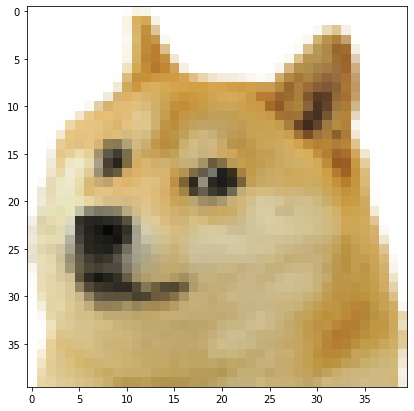

In [13]:
# downsampling rate x20

fig = plt.figure(figsize=(7, 7))

e2_output3 = create_thumbnail(image = e2_img, downsampling_rate = 20)

plt.imshow(e2_output3, vmin = 0, vmax = 255)

plt.savefig('e2_output3.png')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 5ms

In [ ]:
timeit -n 100 -r 7 e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 5)

### Exercise 3: Generalized image blender function

<img src="lab3_exercise3.png" width="800">

In [ ]:
e3_img1 = mpimg.imread('sample_image_1.jpg')
e3_img2 = mpimg.imread('sample_image_2.jpg')
e3_img3 = mpimg.imread('sample_image_3.jpg')
e3_img4 = mpimg.imread('sample_image_4.jpg')
e3_img5 = mpimg.imread('sample_image_5.jpg')

e3_img1 = np.array(e3_img1)     
e3_img2 = np.array(e3_img2)     
e3_img3 = np.array(e3_img3)     
e3_img4 = np.array(e3_img4)     
e3_img5 = np.array(e3_img5)     

In [ ]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(1,5,1)
plt.imshow(e3_img1, vmin = 0, vmax = 255)

plt.subplot(1,5,2)
plt.imshow(e3_img2, vmin = 0, vmax = 255)

plt.subplot(1,5,3)
plt.imshow(e3_img3, vmin = 0, vmax = 255)

plt.subplot(1,5,4)
plt.imshow(e3_img4, vmin = 0, vmax = 255)

plt.subplot(1,5,5)
plt.imshow(e3_img5, vmin = 0, vmax = 255)

In [ ]:

def blend_images(image_list, weight_list):
    
    #create 2D arrays to with same size as images to be blended (all images to be blended are same size)
    #these 2D arrays are for the final RGB values of the blended image
    img_red = np.zeros((len(image_list[0]), len(image_list[0])))
    img_green = np.zeros((len(image_list[0]), len(image_list[0])))
    img_blue = np.zeros((len(image_list[0]), len(image_list[0])))

    #loop through all images in the list
    for i in range(0, len(image_list)):
        img = image_list[i].copy()
        #extract the RGB 2D arrays for each image in the list and multipy them by their corresponding weight
        img_red = np.add(img_red, img[:, :, 0] * weight_list[i])
        img_green = np.add(img_green, img[:, :, 1] * weight_list[i])
        img_blue = np.add(img_blue, img[:, :, 2] * weight_list[i])
        
    blended_img = np.stack([img_red, img_green, img_blue], axis = 2) #put 2D areas together
    output_image = blended_img.astype('int')
    
    return output_image

In [ ]:
# Blend all 5 images with equal weights

e3_part1_image_list =[e3_img1, e3_img2, e3_img3, e3_img4, e3_img5]
e3_part1_weight_list = [0.2, 0.2, 0.2, 0.2, 0.2]

e3_output1 = blend_images(image_list = e3_part1_image_list, weight_list = e3_part1_weight_list)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e3_output1, vmin = 0, vmax = 255)

plt.savefig('e3_output1.png')

In [ ]:
# Blend first 3 images with different weights

e3_part2_image_list =[e3_img1, e3_img2, e3_img3]
e3_part2_weight_list = [0.2, 0.3, 0.5]

e3_output2 = blend_images(image_list = e3_part2_image_list, weight_list = e3_part2_weight_list)

fig = plt.figure(figsize=(5, 5))

plt.imshow(e3_output2, vmin = 0, vmax = 255)

plt.savefig('e3_output2.png')

### Exercise 4: Image rotation function

<img src="lab3_exercise4.png" width="800">

In [ ]:
e4_img = mpimg.imread('sample_image_2.jpg')
e4_img = np.array(e4_img)     

In [ ]:
fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_img, vmin = 0, vmax = 255)

In [ ]:
#takes in an image and a value of either 0, 90, 180, or 270 coressponding to degree amount which 
#the inputed image will be rotated clockwise
#outputs an image which is the original image but rotated by the given amount
def rotate_image(image, rotate_angle): # rotate angle takes one of 0, 90, 180, 270
    
    img = image.copy()
    
    #create 2D arrays with original image RGB values
    img_red = img[:, :, 0]
    img_green = img[:, :, 1]
    img_blue = img[:, :, 2]
    
    #create 2D arrays for output image RGB values
    img_red_flipped = np.zeros((len(img_red), len(img_red)))
    img_green_flipped = np.zeros((len(img_green), len(img_green)))
    img_blue_flipped = np.zeros((len(img_blue), len(img_blue)))
    #if rotate_angle is 0, no if statments are entered, each other possible value of rotate_angle has an if statment
    if rotate_angle == 180:
        #loop through each index in original array
        for i in range(0, len(img_red)):
            for j in range(0, len(img_red)):
                #set rgb values of orignal image to RGB values of new image 
                #at correct indexes according to a 180 degree rotation clockwise
                img_red_flipped[-i, -j] = img_red[i, j]
                img_green_flipped[-i, -j] = img_green[i, j]
                img_blue_flipped[-i, -j] = img_blue[i, j]
        return np.stack([img_red_flipped, img_green_flipped, img_blue_flipped], axis = 2).astype('int')
    if rotate_angle == 90:
        for i in range(0, len(img_red)):
            for j in range(0, len(img_red)):
                #set rgb values of orignal image to RGB values of new image 
                #at correct indexes according to a 90 degree rotation clockwise
                img_red_flipped[j, -i] = img_red[i, j]
                img_green_flipped[j, -i] = img_green[i, j]
                img_blue_flipped[j, -i] = img_blue[i, j]
        return np.stack([img_red_flipped, img_green_flipped, img_blue_flipped], axis = 2).astype('int')
    if rotate_angle == 270:
        for i in range(0, len(img_red)):
            for j in range(0, len(img_red)):
                #set rgb values of orignal image to RGB values of new image 
                #at correct indexes according to a 270 degree rotation clockwise
                img_red_flipped[-j, i] = img_red[i, j]
                img_green_flipped[-j, i] = img_green[i, j]
                img_blue_flipped[-j, i] = img_blue[i, j]
        return np.stack([img_red_flipped, img_green_flipped, img_blue_flipped], axis = 2).astype('int')
                
    output_image = img
    
    return output_image

In [ ]:
# Rotate the image by 0 degrees - This should result in identity

e4_output1 = rotate_image(image = e4_img, rotate_angle = 0)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output1, vmin = 0, vmax = 255)

plt.savefig('e4_output1.png')

In [ ]:
# Rotate the image by 90 degrees

e4_output2 = rotate_image(image = e4_img, rotate_angle = 90)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output2, vmin = 0, vmax = 255)

plt.savefig('e4_output2.png')

In [ ]:
# Rotate the image by 180 degrees

e4_output3 = rotate_image(image = e4_img, rotate_angle = 180)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output3, vmin = 0, vmax = 255)

plt.savefig('e4_output3.png')

In [ ]:
# Rotate the image by 270 degrees

e4_output4 = rotate_image(image = e4_img, rotate_angle = 270)

fig = plt.figure(figsize=(7, 7))

plt.imshow(e4_output4, vmin = 0, vmax = 255)

plt.savefig('e4_output4.png')

## Extra credit: Code efficiency
### Achieve a runtime speed of < 1ms

In [ ]:
timeit -n 100 -r 7 e4_output2 = rotate_image(image = e4_img, rotate_angle = 90)

### Exercise 5: 2D Gaussian image generator

<img src="lab3_exercise5.png" width="800">

In [ ]:
x_range = np.arange(-25, 25, 1)
y_range = np.arange(-25, 25, 1)[::-1]

X, Y = np.meshgrid(x_range, y_range) # More detail on documentation 
                                     # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [ ]:
print(X, X.shape) # Set of x-coordinates in the function domain     

In [ ]:
print(Y, Y.shape) # Set of y-coordinates in the function domain   

In [ ]:
import math
#takes input values to be used in 2D Gaussian Function such as:
#X and Y for length and width of resulting image
#x0 and y0 for center of function
#sigma_x and sigma_y forstandard deviations in the x and y directions
#A the scaling factor for the function
#cmap, the given color scheme to be used in the image
#creates an image representing a 2D Gaussian Function with inputted characteristics
def vis_2d_gaussian(X, Y, sigma_x, sigma_y, x0, y0, A, cmap):

    result = np.zeros((len(X), len(Y))) #result array to be used in imshow with size based on inputted values of size
    for i in range (0, len(X)):
        for j in range (0, len(Y)):
            inside_x = ((i - x0)**2 ) / (2 * (sigma_x**2)) # Calcualating values according to formula, assign to variable
            inside_y = ((j - y0)**2 ) / (2 * (sigma_y**2)) # Calcualating values according to formula, assign to variable
            inside_total = -1 * (inside_x + inside_y)      # Calcualating values according to formula, assign to variable
            total = A * math.exp(inside_total) #calculate value aat each index for 2D Gaussian Function
            red[i, j] = total #assign calculated value at each index to that index of array to be used in imshow
    array_rgb = result.astype('int')
    plt.imshow(array_rgb, cmap)      


In [ ]:
# First parameter set: sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0
# cmap = 'gray'

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0, A = 255, cmap = 'gray')

plt.savefig('e5_output1.png')

In [ ]:
# First parameter set
# cmap = 'jet'

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 10, sigma_y = 10, x0 = 0, y0 = 0, A = 255, cmap = 'jet')

plt.savefig('e5_output2.png')

In [ ]:
# Second parameter set: sigma_x = 5, sigma_y = 5, x0 = 3, y = 3
# grayscale color specturm

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 5, sigma_y = 5, x0 = 3, y0 = 3, A = 255, cmap = 'gray')

plt.savefig('e5_output1.png')

In [ ]:
# Second parameter set: sigma_x = 5, sigma_y = 5, x0 = 3, y = 3
# jet color specturm

fig = plt.figure(figsize=(7, 7))

vis_2d_gaussian(X, Y, sigma_x = 5, sigma_y = 5, x0 = 3, y0 = 3, A = 255, cmap = 'jet')

plt.savefig('e5_output2.png')